In [1]:
from __future__ import division
import os
import sys
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
%precision 4
#plt.style.use('ggplot')
import seaborn as sns
sns.set_style('white')
sns.set_context('paper')

np.random.seed(1234)
import pymc3 as pm
import scipy.stats as stats

import logging
_logger = logging.getLogger("theano.gof.compilelock")
_logger.setLevel(logging.ERROR)

Using gpu device 0: GeForce GTX TITAN (CNMeM is disabled)


$$X \sim N(\mu, \sigma^2)$$

 [-----------------100%-----------------] 1000 of 1000 complete in 0.9 sec

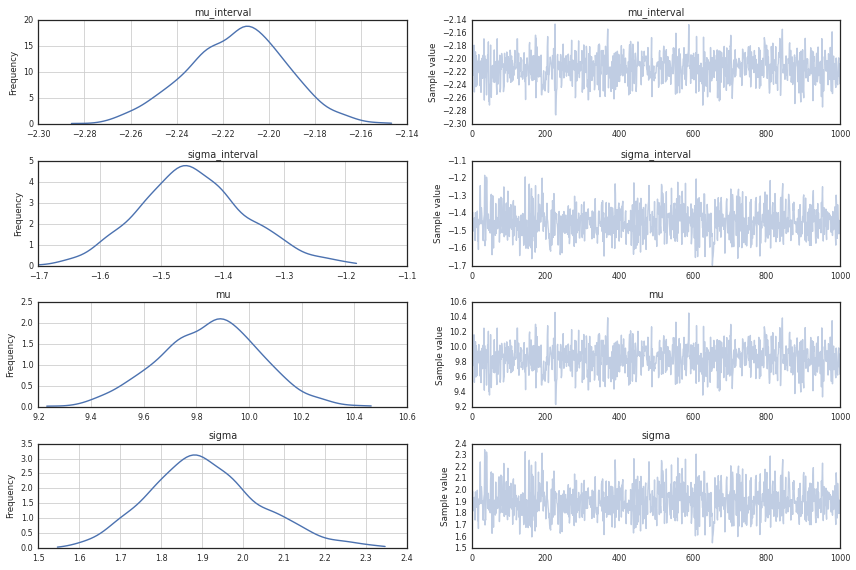

In [4]:
# generate observed data
N = 100
_mu = np.array([10])
_sigma = np.array([2])
y = np.random.normal(_mu, _sigma, N)

niter = 1000
with pm.Model() as model:
    # define priors
    mu = pm.Uniform('mu', lower=0, upper=100, shape=_mu.shape)
    sigma = pm.Uniform('sigma', lower=0, upper=10, shape=_sigma.shape)

    # define likelihood
    y_obs = pm.Normal('Y_obs', mu=mu, sd=sigma, observed=y)

    # inference
    start = pm.find_MAP()
    step = pm.Slice()
    trace = pm.sample(niter, step, start, random_seed=123, progressbar=True)
    pm.traceplot(trace)

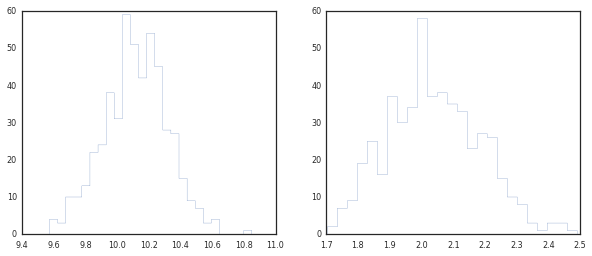

In [3]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1);
plt.hist(trace['mu'][-niter/2:,0], 25, histtype='step');
plt.subplot(1,2,2);
plt.hist(trace['sigma'][-niter/2:,0], 25, histtype='step');